In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver
from IPython.display import HTML

# Define ODE problem

In [2]:
def f(t, y):
    '''
        dy/dt = f(t, y)
        This is f() function on the right
    '''    
    
    return [t*(998*y[0] + 1998*y[1]), -999*y[0] - 1999*y[1]]

t = np.linspace(0, 2.0, 11).reshape(-1,1) # training points
y0_list = [2, -1]

# Reference solution

In [3]:
sol = solve_ivp(f, [t.min(), t.max()], y0_list, method='Radau', rtol=1e-5)

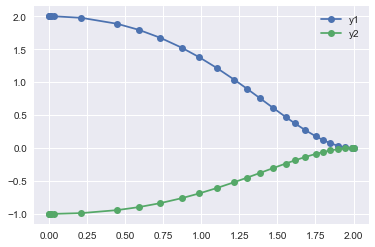

In [4]:
plt.plot(sol.t, sol.y[0], marker='o', label='y1')
plt.plot(sol.t, sol.y[1], marker='o', label='y2')
plt.legend()

# Neural net training

In [5]:
nn = NNSolver(f, t, y0_list, n_hidden=20)
nn

Neural ODE Solver 
Number of equations:       2 
Initial condition y0:      [2, -1] 
Numnber of hidden units:   20 
Number of training points: 11 

In [6]:
nn.reset_weights() # only for re-train
%time nn.train(maxiter=500, iprint=100)

iteration: 0 loss:  194146545.787
iteration: 100 loss:  0.071707013413
iteration: 200 loss:  0.0604635265357
iteration: 300 loss:  0.0227704720546
iteration: 400 loss:  0.00930502841283
         Current function value: 0.005503
         Iterations: 500
         Function evaluations: 648
         Gradient evaluations: 648
CPU times: user 5.69 s, sys: 63.9 ms, total: 5.76 s
Wall time: 5.8 s


# Verifying training set

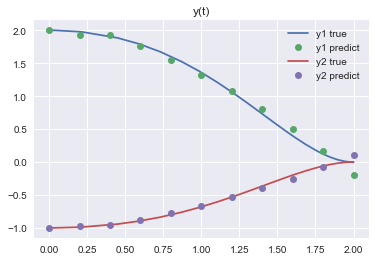

In [7]:
y_pred_list, dydt_pred_list = nn.predict()

plt.plot(sol.t, sol.y[0], label='y1 true')
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')
plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.title('y(t)')

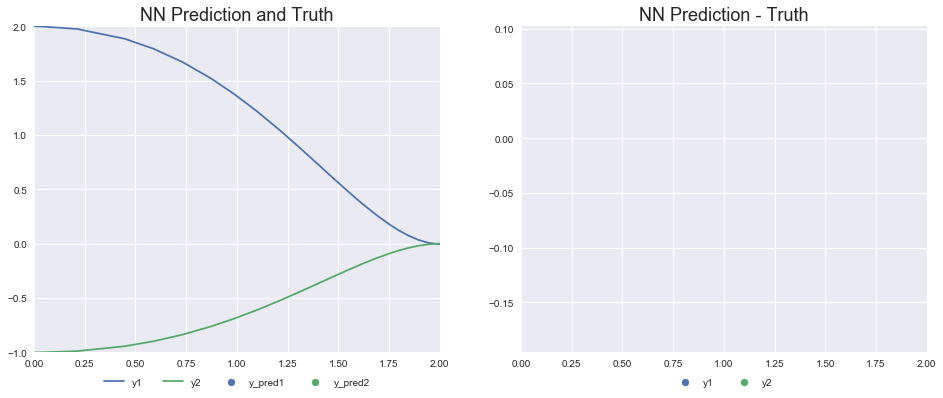

In [8]:
anim = nn.result(t = np.linspace(0, 2.0, 20), interval=20, anim=True, every_n_iter=50)

In [9]:
HTML(anim.to_html5_video())

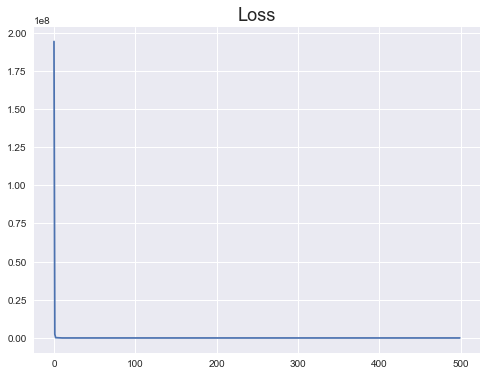

In [10]:
nn.plot_loss()

# Out-of sample prediction

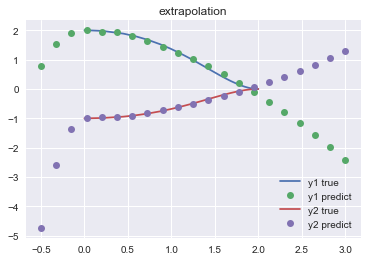

In [11]:
t_test = np.linspace(-0.5, 3.0, 21).reshape(-1,1)
y_pred_list, dydt_pred_list = nn.predict(t=t_test)

plt.plot(sol.t, sol.y[0], label='y1 true')
plt.plot(t_test, y_pred_list[0], 'o', label='y1 predict')
plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t_test, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.title('extrapolation')

# API Docs

In [12]:
help(NNSolver.__init__)

Help on function __init__ in module neuralsolver.core:

__init__(self, f, t, y0_list, n_hidden=10)
    Neural Network Solver Class
    Parameters
    ----------
    f : callable
        Right-hand side of the ODE system dy/dt = f(t, y).
        Similar to the input for scipy.integrate.solve_ivp()
        Important notes:
        - Must use autograd's numpy inside f (import autograd.numpy as np)
        - For a single ODE, should return a list of one element.
    t : column vector, i.e. numpy array of shape (n, 1)
        Training points
    y0_list : a list of floating point numbers
        Initial condition.
        For a single ODE, should be a list of one element.
    n_hidden : integer, optional
        Number of hidden units of the NN



In [13]:
help(nn.train)

Help on method train in module neuralsolver.core:

train(method='BFGS', maxiter=2000, iprint=200) method of neuralsolver.core.NNSolver instance
    Train the neural net
    
    Parameters
    ----------
    method : string, optional
        Optimization method for scipy.optimize.minimize()
        'BFGS' should be the most robust one
    
    maxiter : integer, optional
        Maximum number of iterations
    
    maxiter : integer, optional
        Print loss per iprint step



In [14]:
help(nn.reset_weights)

Help on method reset_weights in module neuralsolver.core:

reset_weights() method of neuralsolver.core.NNSolver instance
    reinitialize NN weights (randomly)



In [15]:
help(nn.predict)

Help on method predict in module neuralsolver.core:

predict(t=None, params_list=None) method of neuralsolver.core.NNSolver instance
    Make new predicts
    
    Parameters
    ----------
    t : column vector, i.e. numpy array of shape (n, 1), optional
        use training points by default



In [16]:
help(nn.result)

Help on method result in module neuralsolver.core:

result(t=None, anim=False, interval=50, every_n_iter=1) method of neuralsolver.core.NNSolver instance
    Plot trainning process at animation
    
    Parameters
    ----------
    t : array, optional
        evaluate at these points
    
    anim : bool, optional
        whether to plot animation or not, default set to False
    
    interval : integer, optional
        time duration between frames, in ms, default set to 50 ms
    
    every_n_iter : integer, optional 
        plot every n iterations of the trainning process, if num of iteration if large, 
    increase every_n_iter to save computing, default set to 1, plotting all the iterations



In [18]:
help(nn.plot_loss)

Help on method plot_loss in module neuralsolver.core:

plot_loss() method of neuralsolver.core.NNSolver instance
    Plot loss in trainning process

